# Work 3 - Cars Datasets (~3 hours)

![Cars](https://images.wolfgangsvault.com/m/xlarge/OMS14838-MZ/motor-trend-vintage-magazine-jul-1-1974.webp)

Also, if you are at a loss on how to use this Notebooks, review [Notebook Basics](https://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Notebook%20Basics.ipynb#Mouse-navigation) and [Working with Markdown Cells](https://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Working%20With%20Markdown%20Cells.ipynb).

First off, save this notebook where you intend to house your code for these sessions. Then download the data set [here](https://drive.google.com/file/d/19Tm95Pql_96iOFb27Je0qB5ZPoZZYwOq/view?usp=sharing) and save it in the same location on your machine as this notebook.

Now, you are ready to begin! Run this notebook cell by cell.

## Step 0 - Import packages and data
First, I need to import my packages - my tools as I build something from this dataset. Throughout this file, I'll have comments on each code cell. Comments are preceeded by '##' while lines of code are not.

For future datasets, I'll be including similar cells and you are welcome to copy them! *Note that they may not work the same way if you are not in the correct environment.*

In [1]:
##First, I import my packages
import pandas as pd
import numpy as np
import glob, os
import re
import plotly; plotly.__version__
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default='notebook'
init_notebook_mode(connected=True)

In [2]:
##I've created an explanatory dataframe for the columns below:

d = {
    'Name': [
        'Car',
        'mpg', 
        'cyl', 
        'disp', 
        'hp', 
        'drat', 
        'wt', 
        'qsec', 
        'vs', 
        'am', 
        'gear',
        'carb'
    ],
    'Description': [
        'Make and Model of car',
        'Miles per Gallon', 
        'Number of Cylinders', 
        'Displacement (cubic inches)', 
        'Gross horsepower (hp)', 
        'Rear axle ratio',
        'Weight (in mutliples of 1000 lbs)',
        '1/4 mile time (seconds)',
        'Engine (0 = V-shaped, 1 = Straight)',
        'Transmission (0 = automatic, 1 = manual)',
        'Number of forward gears',
        'Number of carburetors'
    ]
}

df_columns = pd.DataFrame.from_dict(d)

df_columns

,Name,Description
0,Car,Make and Model of car
1,mpg,Miles per Gallon
2,cyl,Number of Cylinders
3,disp,Displacement (cubic inches)
4,hp,Gross horsepower (hp)
5,drat,Rear axle ratio
6,wt,Weight (in mutliples of 1000 lbs)
7,qsec,1/4 mile time (seconds)
8,vs,"Engine (0 = V-shaped, 1 = Straight)"
9,am,"Transmission (0 = automatic, 1 = manual)"


***Your turn - Background Research***

>"The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models)." - [R documentation](https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars)

Learn more about Motor Trend at the [website](https://www.motortrend.com/) and on [Wikipedia](https://en.wikipedia.org/wiki/Motor_Trend).

Examine the dataframe above - what do all of these things mean? Describe each below and ensure that you understand the differences:

---

Now, I need to connect to my data using pandas [read_csv function](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). As a reminder, a programming function is a reusable module of code that often has an input, processes it, then returns an output. You can read more [here](https://www.tutorialspoint.com/computer_programming/computer_programming_functions.htm).
Now, I need to connect to my data using pandas [read_csv function](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). As a reminder, a programming function is a reusable module of code that often has an input, processes it, then returns an output. You can read more [here](https://www.tutorialspoint.com/computer_programming/computer_programming_functions.htm).


In [3]:
##Now, I need to connect to my data file.
df_mtcars = pd.read_csv('mtcars.csv')

## Step 1 - Initial observations & Background Research
df is a **DataFrame** - a 2D data-structure with columns and rows where the columns can contain different data types. An individual column of a DataFrame is called a **Series**. These are key terms and the pandas package has an excellent overview [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/01_table_oriented.html) that is very worth reviewing.

First, as always, let's get a lay of the data. There are a few core operations that I perform on most datasets at the very beginning:
- I can simply call the dataframe by typing the name of the DataFreme (in this case, 'df').
- I can look at the top few rows of the dataframe with [head() function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) or the bottom few rows of the dataframe with [tail() function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html).
- I can call the [dtypes function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).
- I can call the [info() function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html).
- I can call the [describe() function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html). 

Run each code cell below.Run each code cell below.

In [4]:
df_mtcars

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [5]:
df_mtcars.head()

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
df_mtcars.tail()

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [7]:
df_mtcars.dtypes

Car      object
mpg     float64
cyl       int64
disp    float64
hp        int64
drat    float64
wt      float64
qsec    float64
vs        int64
am        int64
gear      int64
carb      int64
dtype: object

In [38]:
df_mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Car     32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [9]:
df_mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [10]:
##Run this cell to learn more about the column meanings
df_columns

,Name,Description
0,Car,Make and Model of car
1,mpg,Miles per Gallon
2,cyl,Number of Cylinders
3,disp,Displacement (cubic inches)
4,hp,Gross horsepower (hp)
5,drat,Rear axle ratio
6,wt,Weight (in mutliples of 1000 lbs)
7,qsec,1/4 mile time (seconds)
8,vs,"Engine (0 = V-shaped, 1 = Straight)"
9,am,"Transmission (0 = automatic, 1 = manual)"


What I usually do after this initial exploration of the dataset is I make some notes about what I've learned from each line of code. Things I try to capture every time might be:
- what are the names of each column and do I understand what each means? Consider our last class where we discussed the importance of ['setting' in our data narratives](https://docs.google.com/presentation/d/1ql79k6Knm6sjbDdsEjCW6Ztkz_V7p5V1jyZrmMNN6U8/edit?usp=sharing).
- What are the datatypes (called [dtypes](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#dtypes)) of each column?
- Are there any surprising rows of data?
- What interesting general statistics have I learned?

***Your Turn - DataFrame Information Functions + Learnings:***
So you give it a shot! Examine the returned information from those lines of code above and write what you learned about each function below:
1. *df*: 32 kind of cars, kinda small dataset?
2. *head()*: First five
3. *tail()*: Last five
4. *info()*: All data is filled
5. *describe():* Numbers average a little smaller than today's aveerage, such as mpg for 24.9 vs 20.009

And what did you learn about the dataset itself?

- 
- 
- 
...

---

Based on the data, let's do a little bit of clarification (especially as we consider plots + stories. We'll use pandas [DataFrame.replace() function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html#:~:text=dict-like%20%60to_replace%60https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html#:~:text=dict-like%20%60to_replace%60)

In [11]:
##Let's do a test:
df_test1 = df_mtcars.replace({0: 'V-shaped', 1: 'Straight'})
df_test1

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,V-shaped,Straight,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,V-shaped,Straight,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,Straight,Straight,4,Straight
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,Straight,V-shaped,3,Straight
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,V-shaped,V-shaped,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,Straight,V-shaped,3,Straight
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,V-shaped,V-shaped,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,Straight,V-shaped,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,Straight,V-shaped,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,Straight,V-shaped,4,4


***Your Turn: Does this look right?***
Review the [DataFrame.replace() function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html#:~:text=dict-like%20%60to_replace%60https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html#:~:text=dict-like%20%60to_replace%60) - is the function working as expected? Once you've answered this question, look at the code in the next cell.

df_test1 has correctly run *according to how it was called.* It did replace all instances of 0 and 1 according to our directions but it applied it to the entire dataframe, as we wrote. We need to specify the column where we want to apply the replacement. Let's try again below.

In [12]:
df_test2 = df_mtcars['vs'].replace({0: 'V-shaped', 1: 'Straight'})
df_test2

0     V-shaped
1     V-shaped
2     Straight
3     Straight
4     V-shaped
5     Straight
6     V-shaped
7     Straight
8     Straight
9     Straight
10    Straight
11    V-shaped
12    V-shaped
13    V-shaped
14    V-shaped
15    V-shaped
16    V-shaped
17    Straight
18    Straight
19    Straight
20    Straight
21    V-shaped
22    V-shaped
23    V-shaped
24    V-shaped
25    Straight
26    V-shaped
27    Straight
28    V-shaped
29    V-shaped
30    V-shaped
31    Straight
Name: vs, dtype: object

***Your Turn: Does this look right?***
Review the [DataFrame.replace() function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html#:~:text=dict-like%20%60to_replace%60https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html#:~:text=dict-like%20%60to_replace%60) - is the function working as expected? Once you've answered this question, look at the code in the next cell.

This time, we applied the replacement to the correct column BUT we also saved this replacement as its own dataframe. Had we applied this to our core dataframe of df_mtcars, it would have effectively deleted the other columns. In the future, as you play with dataframes, this can occur. If it does, you can got back to the read_csv and run your code until your most recent call to backtrack and figure out where things went wrong. This next time, we'll get it right.

In [13]:
df_mtcars['vs'] = df_mtcars['vs'].replace({0: 'V-shaped', 1: 'Straight'})
df_mtcars

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,V-shaped,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,V-shaped,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,Straight,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,Straight,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,V-shaped,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,Straight,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,V-shaped,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,Straight,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,Straight,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,Straight,0,4,4


***Your Turn: Replace 0 and 1 for am.***

Modify the code below and replace the 0 in the 'am' column with 'automatic' and the 1 in the 'am' column with 'manual'.

---

In [14]:
##Edit the code cell below to replace the 0 in the 'am' column with 'automatic' and the 1 in the 'am' column with 'manual'.
##Once it looks right, you can move on. If it does not, run and select all cells above this cell.
df_mtcars['vs'] = df_mtcars['vs'].replace({0: 'V-shaped', 1: 'Straight'})
df_mtcars

,Car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,V-shaped,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,V-shaped,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,Straight,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,Straight,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,V-shaped,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,Straight,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,V-shaped,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,Straight,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,Straight,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,Straight,0,4,4


## Step 2 - Initial plots
Now is a nice time to discuss categorical, discrete, and continuous variables or series.

1. *Categorical series:* A column of data that contains a finite number of categories or distinct groups. For example, in this dataset,  vs (Engine) is a categorical series.
2. *Discrete series:* A column of data that has a numeric and countable number of values. For example, in this dataset, hp (Gross Horsepower (hp)) is a discrete series.
3. *Continuous series:* A column of data that has a numeric and infinite number of values. For example, in this dataset, wt (Weight (in multiples of 1000 lbs)) is a continuous series.

You can read more [here](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/what-are-categorical-discrete-and-continuous-variables/).

***Your Turn - Variable Types:***

- What are the variable types for each column of data in the mtcars dataframe?
- Can a data set be considered more than one variable type? If yes, give an example?

---

Now, we can begin to consider plot types. In this exercise, we'll play with a few plot types:

a. *Histogram:* this chart is used to group or bin numeric data and then plots the frequency/number of data points in each bin (also called a [frequency distribution](https://www.mathsisfun.com/data/frequency-distribution.html). It looks similar to a bar chart. You can read more [here](https://www.mathsisfun.com/data/histograms.html).2. *Histogram:* this chart is used to group or bin numeric data and then plots the frequency/number of data points in each bin (also called a [frequency distribution](https://www.mathsisfun.com/data/frequency-distribution.html). It looks similar to a bar chart. You can read more [here](https://www.mathsisfun.com/data/histograms.html).

b. *Bar:* this chart is used to plot categorical vs numeric data. You can read more [here](https://www.mathsisfun.com/data/bar-graphs.html).

c. Box and Whisker: this chart is used to summarize numeric data using the minimum, first quartile, median, third quartile, and maximum. It provides less information that a histogram but is simpler to observe. You can read more [here](https://datavizcatalogue.com/methods/box_plot.html).5. Box and Whisker: this chart is used to summarize numeric data using the minimum, first quartile, median, third quartile, and maximum. It provides less information that a histogram but is simpler to observe. You can read more [here](https://datavizcatalogue.com/methods/box_plot.html).

d. *Scatter:* this chart is used to plot numeric vs numeric data when the relationshipbetween the two series of data needs investigation. You can read more [here](https://www.mathsisfun.com/data/scatter-xy-plots.html).

You will have a chance to make each of these plots in this exercise. Plotly Express has a huge library of basic plots that you can peruse [here](https://plotly.com/python/plotly-express/#galleryhttps://plotly.com/python/plotly-express/#gallery).

### Step 2a - Histogram Charts

Let's start with the histogram. As we said above, a histogram can be used to bin a series of numeric data to observe it's frequnecy distribution. So we'll use plotly express's [histogram function](https://plotly.com/python/histograms/).

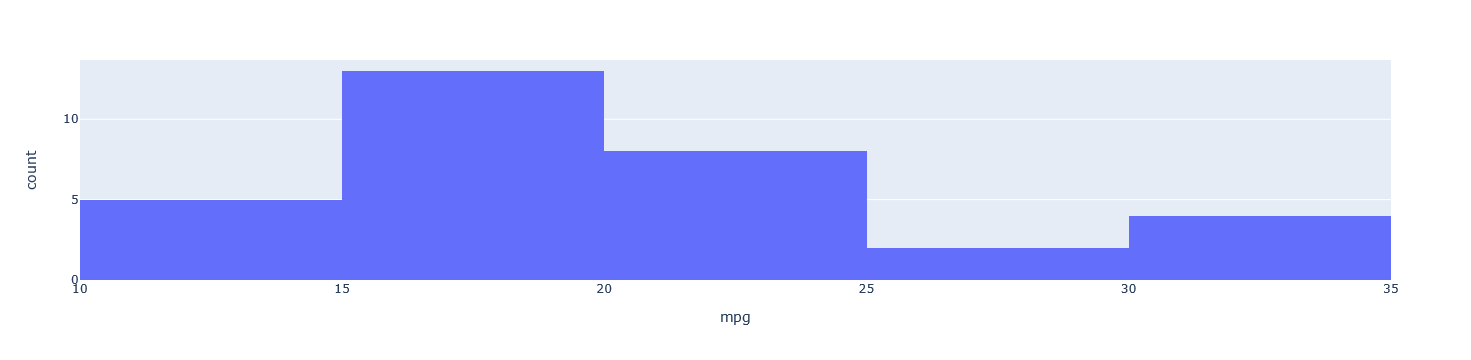

In [15]:
fig = px.histogram(df_mtcars, x='mpg')
fig.show()

***Your Turn - What does this plot tell you?***

What do you now know? What more do you want to know?

Most cars average around 15-25 mpg, which is less than the average today due to technological advances.

Now let's mess with some of the core parts of the historgram:
- [The number of bins](https://plotly.com/python/histograms/#:~:text=count-,Choosing%20the%20number%20of%20bins,-By%20default%2C%20the)
- [The different values of a column (especially categorical)](https://plotly.com/python/histograms/#:~:text=count-,Several%20histograms%20for%20the%20different%20values%20of%20one%20column,-import%20plotly.express)

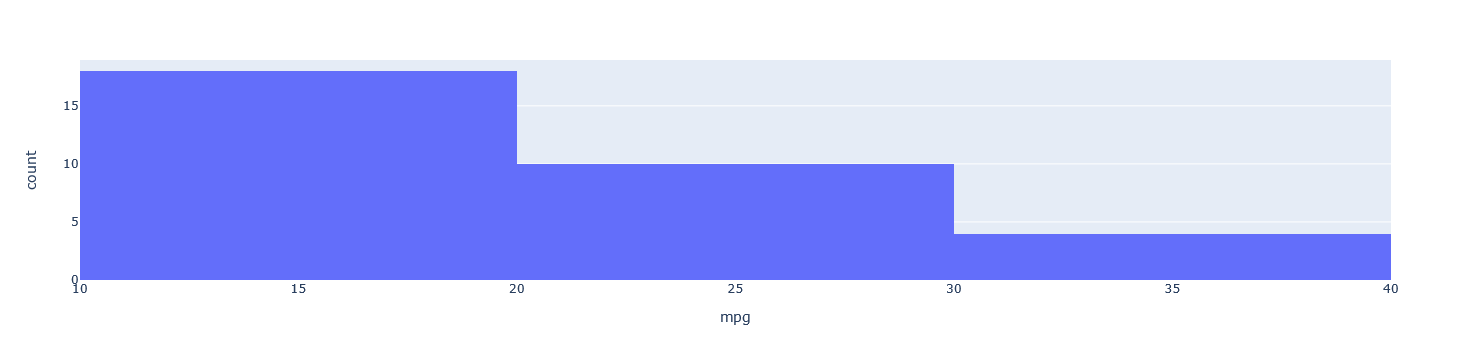

In [10]:
##Edit the code below to have 1-4 bins and color based on Engine:
fig = px.histogram(df_mtcars, x='mpg',nbins = 4)
fig.show()

***Your Turn - Interpretation***

How do these modifications change your understanding of the data?

Turning bins to four turns out that there are more avareage 10-20 mpg rather than 20-30
---

### Step 2b - Bar Charts

Let's now play with the bar chart: we've established that a bar chart can be used to visualize numeric data for categories. You can read more about bar plots in plotly express [here](https://plotly.com/python/bar-charts/https://plotly.com/python/bar-charts/). Let's make a plot that compares Engine between an V-shaped vs Straight engines.

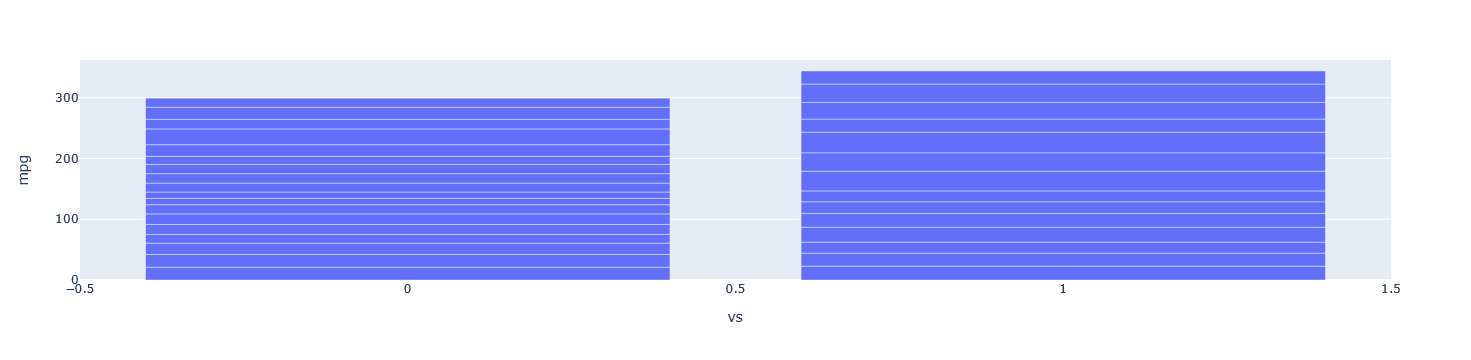

In [11]:
fig = px.bar(df_mtcars, x='vs', y='mpg')
fig.show()

***Your Turn - What is this plot showing us?***

Is this what you expected?

---

This information is a little difficult to digest. So let's select and aggregate the data. As a reminder here is a quick overview of [aggregation functions](https://www.geeksforgeeks.org/pandas-groupby/?ref=lbp#:~:text=Applying%20function%20to%20group). This time, we'll use the median function and I will make a new dataframe to summarize.

In [12]:
df_mtcars_vs_mpg = df_mtcars.groupby('vs')['mpg'].agg(
    mpg_median = 'median'
    )

df_mtcars_vs_mpg = df_mtcars_vs_mpg.sort_values('mpg_median', ascending = True)

df_mtcars_vs_mpg

,mpg_median
vs,
0,15.65
1,22.80


Now let's plot the results of our aggregation.

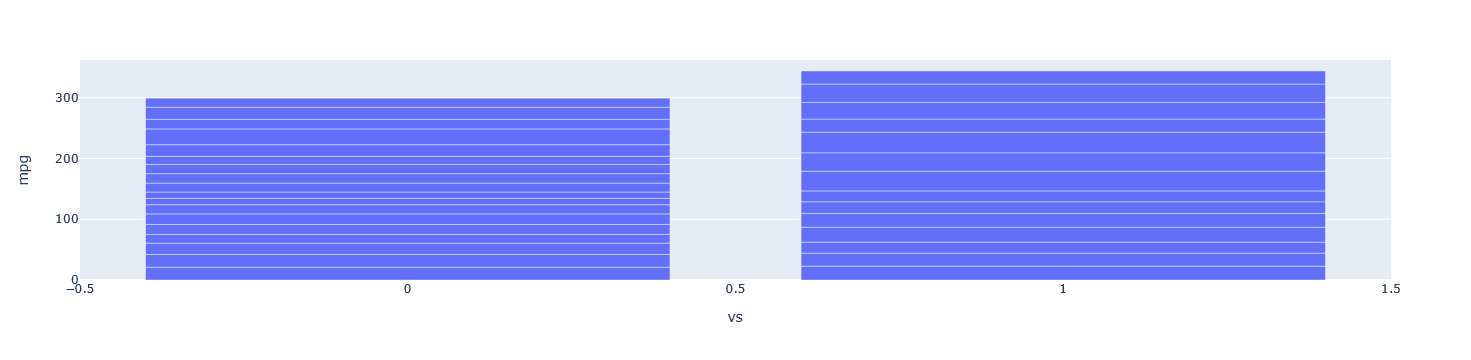

In [13]:
##Edit the code below so that it is calling the newest dataframe:
fig = px.bar(df_mtcars, x='vs', y='mpg')
fig.show()

***Your Turn - What is this plot telling you?***

What is this plot missing based on what you learned in the histogram?

Adds them together and figure out that V-shape has better mpg
---

### Step 2c - Box and Whisker Charts

The bar graph is nice and simple but it leaves out some of the interesting information about the distribution of the data. We can make a more descriptive chart using the box and whisker chart on our core df_mtcars dataset (learn more about plotly express's box and whisker [here](https://plotly.com/python/box-plots/)).

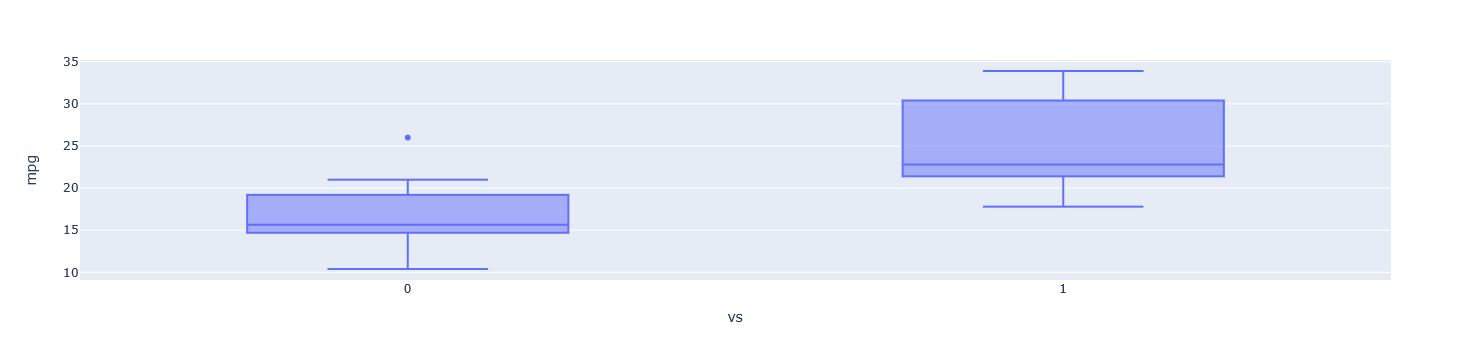

In [14]:
fig = px.box(df_mtcars, x='vs', y = 'mpg')
fig.show()

***Your Turn - What does this plot tell you?***

What additional information do you now see that you could not see in the box plot?

---

For the V-shaped data, there is an outlier (the blue dot). But which data point is it? We can modify the plot to include more information when we hover.

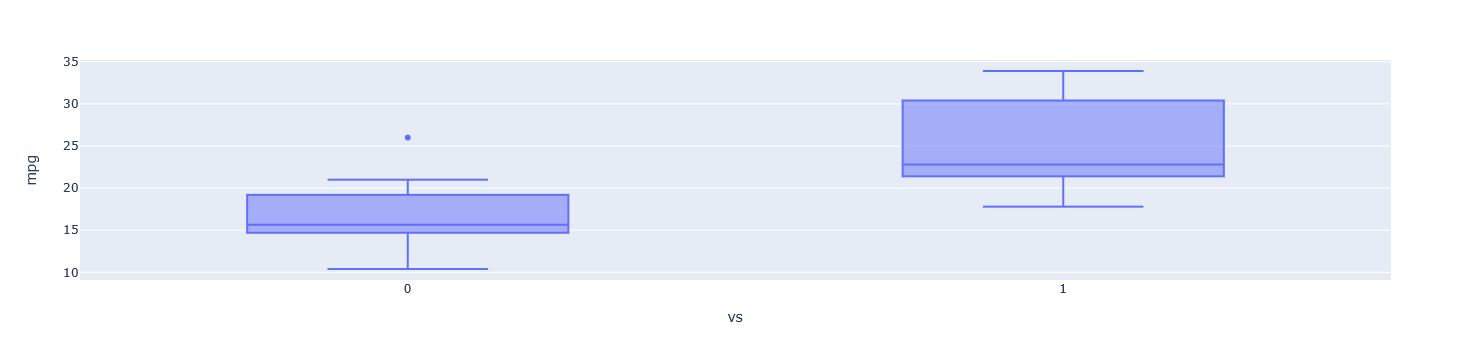

In [15]:
fig = px.box(
    df_mtcars, 
    x='vs', 
    y = 'mpg',
    hover_data = ['Car']
)
fig.show()

***Your Turn - Which car is the outlier?***

The outlier is the Porche

---

### Step 2d - Scatter Charts

As we recall, a scatter plot can be used to plot the relationship between two numeric variables. Let's continue to plot between disp and mpg. You can learn more about plotly express scatter plots [here](https://plotly.com/python/line-and-scatter/).

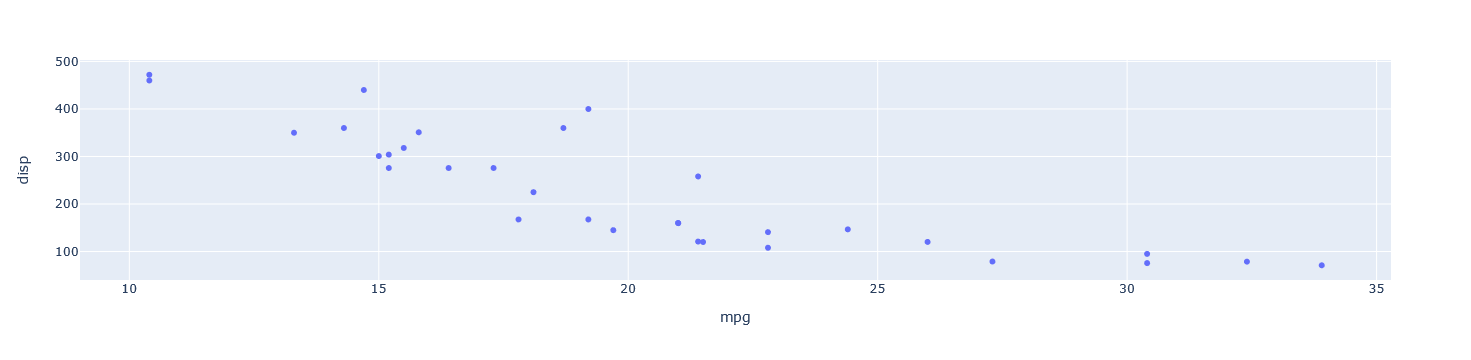

In [16]:
fig = px.scatter(
    df_mtcars, 
    x='mpg', 
    y = 'disp',
    hover_data = ['Car']
)
fig.show()

***Your Turn - What is this plot telling you?***

Is there a relationship?

The less the displacement value, the higher the mpg

The higher the mpg, the less the displacement alue

---

Let's add a trendline! Check the documentation [here](https://plotly.com/python/linear-fits/) to add to the cell below.

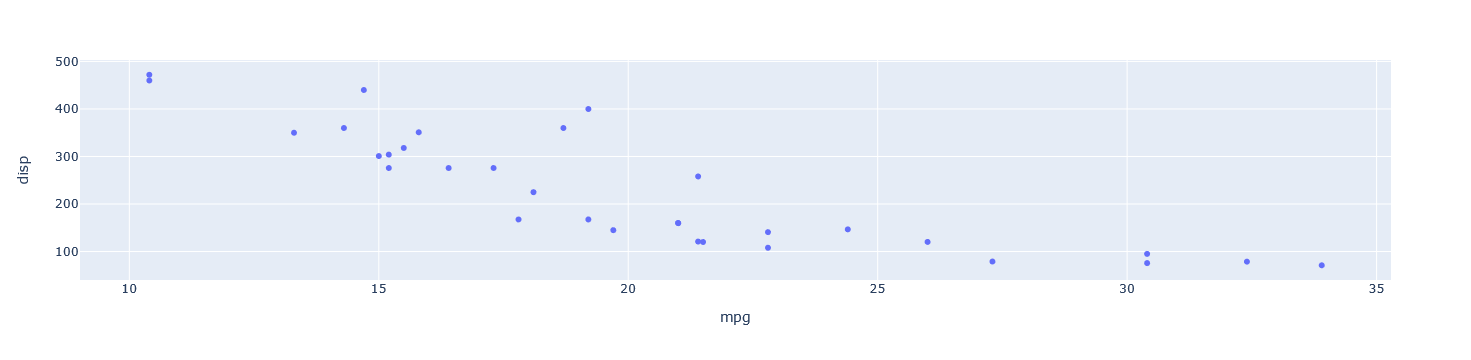

In [21]:
##Edit the code below.
fig = px.scatter(
    df_mtcars, 
    x='mpg', 
    y = 'disp',
    trendline = 10
)

fig.show()

***Your Turn - R^2***

Review [this](https://statisticsbyjim.com/regression/interpret-r-squared-regression/) and [this](https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/assessing-fit-least-squares-regression/a/r-squared-intuition) artice about the coefficient of determination. What do you think about the trendline after reading this?

If you love reading about statistics or want to go deeper, you can read a long article [here](https://people.duke.edu/~rnau/rsquared.htm).

---

Let's differentiate within our data a little more. Let's add two categorical data series to the plot: 'vs' as color and 'am' as a facet_col. Let's also include a [title, labels for the axes, and more descriptive legend title](https://plotly.com/python/figure-labels/).

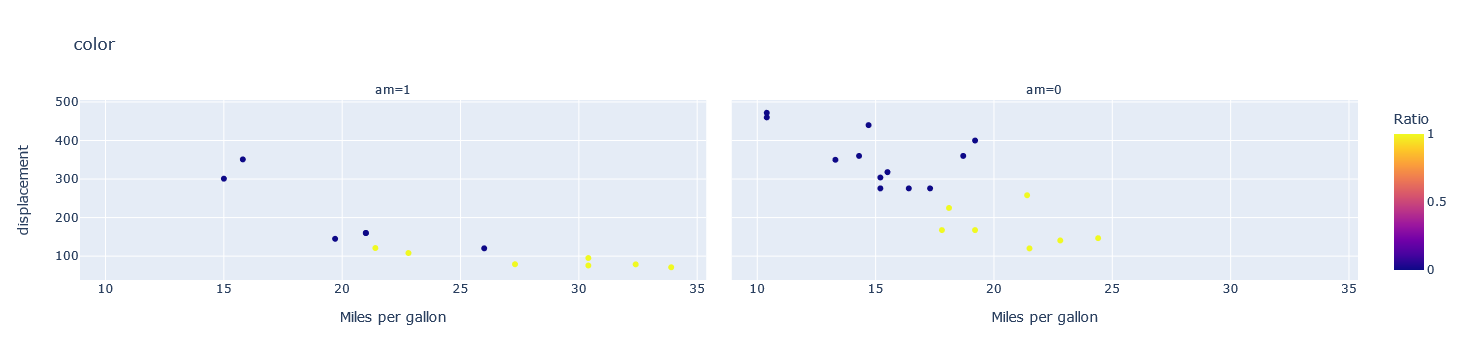

In [37]:
##Edit the code below.
fig = px.scatter(
    df_mtcars, 
    x='mpg', 
    y = 'disp',
    trendline = 3,
    facet_col = 'am',
    color = 'vs',
    title = 'color',
    labels = {
        'mpg': 'Miles per gallon',
        'disp': 'displacement',
        'vs' : 'Ratio'
    }
    
)
fig.show()

***Your Turn - what do these plots tell you?***

Did these additional steps help or hurt your analysis? But adding these different factors, what did you gain?

Easier to tell the distinct points
---

This was a great overview of plots using plotly express and I encourage you to explore [more](https://plotly.com/python/plotly-fundamentals/https://plotly.com/python/plotly-fundamentals/) - it is a very powerful package.

For the purposes of simplicity, you are not expected to include other types of plots for this data set. 

## Step 3
This is a pretty clean data set and we've done a lot. Now it is up to you to do more EDA and find a story in the data set.

### A Note on Finding Stories in Data
Consider what we've discussed in our sessions thus far: the importance of plot and its different structures, knowing your audience, and the setting/source of the data. 

In this data set, it may help to have fun with the definition of your audience: Do they already own a car from 1974 and want to know about the wider landscape? Are you trying to sell a car to someone? Or are you trying to buy a car yourself? Or are you speaking with a group of car historians about your findings? What might someone value about their car? How will you explain these gearhead concepts to someone who doesn't know a lot about cars? What additional information associated with this dataset could be interesting to include?

As you sort thru a story, try to answer a couple of questions:
- Who is my audience?
- What do they care about?
- Who or what is my data about? Is there a main character?
- What is the context of the data? Where and when is it?
- Why am I telling this story? What is the exciting part about the data or its surrounding story?
- How will I package this together? Will I include additional visuals or a backstory? What is the arc (or otherwise) of the story? (remember [ABT](https://www.youtube.com/watch?v=ERB7ITvabA4&ab_channel=TEDMEDhttps://www.youtube.com/watch?v=ERB7ITvabA4&ab_channel=TEDMED) as an option)

For teams that are presenting (**Teams Cheetah and Lion**), I recommend that you all go off in different directions for a little bit, come together will any interesting leads, and then dive in together to create a **quick 10 minute presentation**. 

Feel free to re-use the code and make edits! Remember that there is a difference between markdown and code cells and good luck! If you run into extreme issues, please e-mail me!

After completing this work, please fill out the following [survey](https://forms.gle/6Qdfk6jVTBcEp9NM6).